In [ ]:
import os
import sys

import pandas as pd
import numpy as np
from scripts.csvtopaquet import csv_to_parquet_single_file

current_directory = os.getcwd()
csv1_file_path = os.path.join(current_directory, '01-data', 'ex_fraud.csv')
csv2_file_path = os.path.join(current_directory, '01-data', 'ex_fraud2.csv')
csv3_file_path = os.path.join(current_directory, '01-data', 'ex1_Base.csv')
csv4_file_path = os.path.join(current_directory, '01-data', 'FD_creditcard_data.csv')

output_file_path1 = os.path.join(current_directory, '01-data', 'ex_fraud.parquet')
output_file_path2 = os.path.join(current_directory, '01-data', 'ex_fraud2.parquet')
output_file_path3 = os.path.join(current_directory, '01-data', 'ex1_Base.parquet')
output_file_path4 = os.path.join(current_directory, '01-data', 'FD_creditcard_data.parquet')

csv_to_parquet_single_file(csv_file_path=csv1_file_path, output_file_path=output_file_path1, chunksize=100000, sample_rows=None, drop_columns=None)
csv_to_parquet_single_file(csv_file_path=csv2_file_path, output_file_path=output_file_path2, chunksize=100000, sample_rows=None, drop_columns=None)
csv_to_parquet_single_file(csv_file_path=csv3_file_path, output_file_path=output_file_path3, chunksize=100000, sample_rows=None, drop_columns=None)
csv_to_parquet_single_file(csv_file_path=csv4_file_path, output_file_path=output_file_path4, chunksize=100000, sample_rows=None, drop_columns=None)

In [2]:
current_directory = os.getcwd()
parquetFile1 = os.path.join(current_directory, '01-data', 'ex_fraud.parquet')
parquetFile2 = os.path.join(current_directory, '01-data', 'ex_fraud2.parquet')
parquetFile3 = os.path.join(current_directory, '01-data', 'ex1_Base.parquet')
parquetFile4 = os.path.join(current_directory, '01-data', 'FD_creditcard_data.parquet')


df1 = pd.read_parquet(parquetFile1)
df2 = pd.read_parquet(parquetFile2)
df3 = pd.read_parquet(parquetFile3)
df4 = pd.read_parquet(parquetFile4)


print('df1:', df1.dtypes)
print('')
print('df2:',df2.dtypes)
print('')
print('df3:',df3.dtypes)
print('')
print('df4:',df4.dtypes)


df1: fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards            

# Logistic Regression

In [ ]:
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import openpyxl
import pandas as pd
import statsmodels.api as sm
import numpy as np  # Importing numpy
from sklearn.model_selection import train_test_split

# Assuming your DataFrame and target variable setup
X = df4.drop(['Class','id'], axis=1)

#X = df4.drop(['Class','id','gender','familyincome','housepayment','familysize'], axis=1)
#columns_data = ['gender','familyincome','housepayment','familysize']
#dummy_columns = pd.get_dummies(X, dtype=int)
#X = pd.concat([X, dummy_columns], axis=1)

Y = df4['Class']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.Logit(Y, X).fit()

# Get model summary
print(model.summary())


# Descision Tree

Model Accuracy: 99.80%


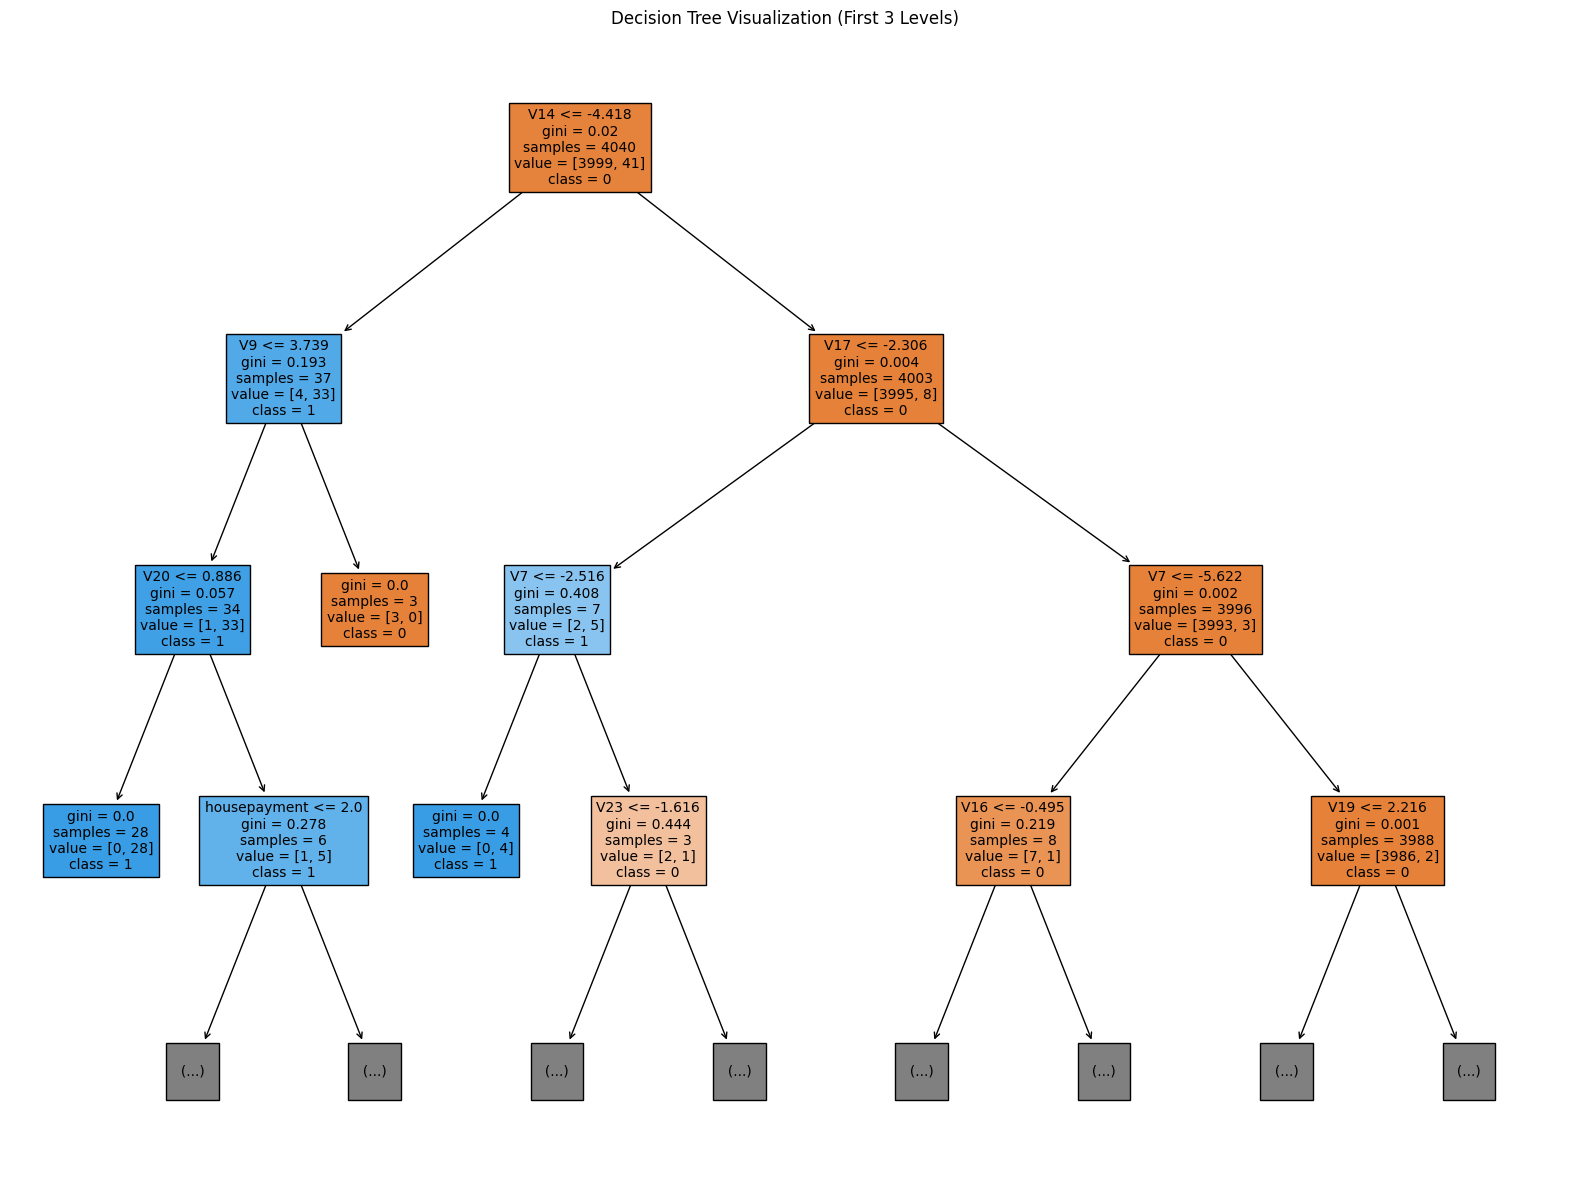

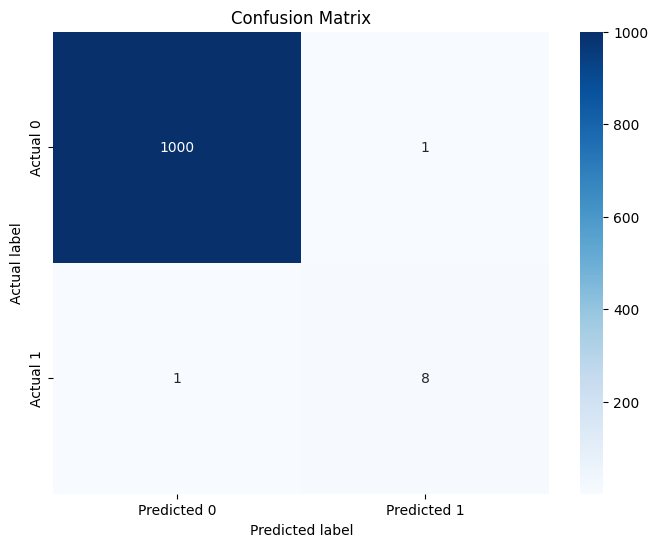

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1001
           1       0.89      0.89      0.89         9

    accuracy                           1.00      1010
   macro avg       0.94      0.94      0.94      1010
weighted avg       1.00      1.00      1.00      1010



NameError: name 'X' is not defined

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import shap

# Assuming your DataFrame and target variable setup
X2 = df4.drop(['Class','id'], axis=1)

#X = df4.drop(['Class','id','gender','familyincome','housepayment','familysize'], axis=1)
#columns_data = ['gender','familyincome','housepayment','familysize']
#dummy_columns = pd.get_dummies(X, dtype=int)
#X = pd.concat([X, dummy_columns], axis=1)

Y2 = df4['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

# Training a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Functions for calculating and estimating entropy are assumed to be correctly implemented as per your initial snippet
# average_entropy_at_depths = estimate_entropy_at_depths(dt_model, X_train, y_train)
# for depth, entropy in average_entropy_at_depths.items():
#     print(f"Depth {depth}: Average Entropy = {entropy:.4f}")

# Decision Tree visualization (truncated to the first 3 levels for simplicity)
plt.figure(figsize=(20,15))
plot_tree(dt_model, filled=True, feature_names=X2.columns, class_names=['0', '1'], max_depth=3, fontsize=10)
plt.title("Decision Tree Visualization (First 3 Levels)")
plt.show()

# Displaying the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Printing the classification report
report = classification_report(y_test, y_pred)
print(report)

# Displaying feature importances
feature_importances = pd.DataFrame(dt_model.feature_importances_, index=X.columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)
print(feature_importances)

# SHAP Value Visualization
explainer = shap.TreeExplainer(dt_model)
shap_values = explainer.shap_values(X_test)

# Handling different shapes of shap_values for binary classification
if isinstance(shap_values, list):  # For binary classification SHAP returns a list
    # Assuming interest in the positive class (index 1)
    shap_values_pos_class = shap_values[1]
else:
    shap_values_pos_class = shap_values

# Summary Plot for the positive class
plt.figure(figsize=(20, 10))
shap.summary_plot(shap_values_pos_class, X_test, plot_type="bar")
plt.show()

# Detailed Summary Plot for the positive class
plt.figure(figsize=(20, 10))
shap.summary_plot(shap_values_pos_class, X_test)
plt.show()


# Force Plot for the first prediction of the positive class
shap.initjs()  # Initializes JavaScript visualization in the notebook
display(shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:]))


In [ ]:
import shap

# Initialize JavaScript visualization in the notebook (for Jupyter Notebooks or JupyterLab)
shap.initjs()

# Explainer
explainer = shap.TreeExplainer(dt_model)

# SHAP Values - Considering you're dealing with a Decision Tree for binary classification
shap_values = explainer.shap_values(X_test)

# Selecting SHAP values for the positive class if binary classification
# Assuming binary classification here as per your setup
if isinstance(shap_values, list):  
    shap_values_for_pos_class = shap_values[1]
    expected_value_for_pos_class = explainer.expected_value[1]
else:  # For non-binary or if the model outputs directly match the SHAP values structure
    shap_values_for_pos_class = shap_values
    expected_value_for_pos_class = explainer.expected_value

# Summary Plot for the positive class
plt.figure(figsize=(20, 10))
shap.summary_plot(shap_values_for_pos_class, X_test, plot_type="bar")
plt.show()

# Detailed Summary Plot for the positive class
plt.figure(figsize=(20, 10))
shap.summary_plot(shap_values_for_pos_class, X_test)
plt.show()

# Adjusted Force Plot for the first prediction of the positive class
# Note: Correcting the function call as per SHAP v0.20+ requirements
shap.force_plot(
    base_value=expected_value_for_pos_class, 
    shap_values=shap_values_for_pos_class[0], 
    features=X_test.iloc[0,:], 
    feature_names=X_test.columns.tolist()
)
